___
# `Matplotlib`
<img src='data/img/matlogo.webp'></img>


___
### Импорт библиотек и датасета

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data/covid_preproccessed.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86785 entries, 0 to 86784
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           86785 non-null  int64  
 1   date                                 86785 non-null  object 
 2   country                              86785 non-null  object 
 3   confirmed                            86785 non-null  float64
 4   deaths                               86785 non-null  float64
 5   recovered                            86785 non-null  float64
 6   active                               86785 non-null  float64
 7   daily_confirmed                      86564 non-null  float64
 8   daily_deaths                         86564 non-null  float64
 9   daily_recovered                      86564 non-null  float64
 10  total_vaccinations                   10629 non-null  float64
 11  people_vaccinated           

___
## Холст
___
### plt.<a>figure</a> : Параметры настройки холста
- `figsize=`(l,h) : Размер холста
- `facecolor=` : Цвет границы холста
- `dpi=` : Масштаб холста




In [3]:
fig = plt.figure(figsize=(10,5), facecolor='gray', dpi=100, )


<Figure size 1000x500 with 0 Axes>

___
## Координатная плоскость
___
### <a>.add_axes</a>( [0, 0, 1, 1] ) : Создание координатной плоскости
- `facecolor=` : Цвет внутри координатной плоскости
- `polar=` : True - назначает полярную систему координат

### <a>.xaxis.set_tick_params</a>( ) : Параметры отображения надписей по оси X
- `rotation=` : Угол поворота надписей по оси X
### <a>.set_title</a>( ) : Название графика
- `fontsize=` : Размер шрифта в названии
- `c=` : Цвет надписи
### <a>.set_xlabel</a>( ) : Название оси X
- `fontsize=` : Размер шрифта в названии
### <a>.set_xticks</a>( _range()_ ) : Диапазон значений по оси X
- `fontsize=` : Размер шрифта в названии
### <a>.grid</a>(  ) : Отображение сетки
- `axis=` : Ось для отображения сетки


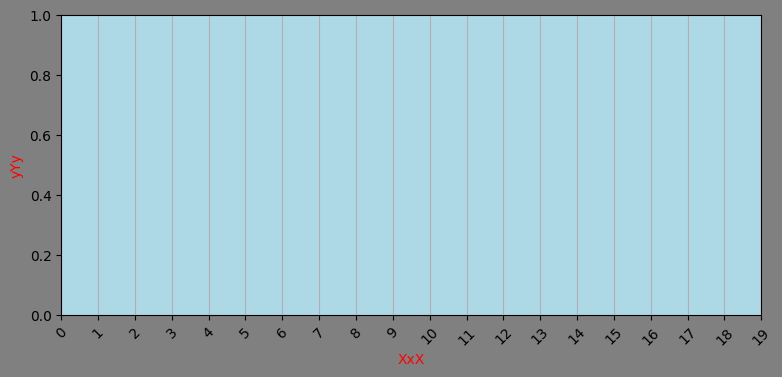

In [4]:
fig = plt.figure(figsize=(7,3), facecolor='gray', dpi=100, )
axes = fig.add_axes([0,0,1,1],facecolor='lightblue', polar=False)
axes.xaxis.set_tick_params(rotation=45)
axes.set_xlabel('XxX', c='r', fontsize=10)
axes.set_ylabel('yYy', c='r', fontsize=10)
axes.set_xticks(range(20));
axes.grid(axis='x')


### <a>.subplots</a>( ) : Создание матрицы координатных плоскостей
- `nrows=` : Количество строк
- `ncols=` : Количество столбцов
- `figsize=`(l,h) : Размер холста
- `facecolor=` : Цвет границы холста
- `dpi=` : Масштаб холста
- `sharex=` : Рисует шаг по оси X


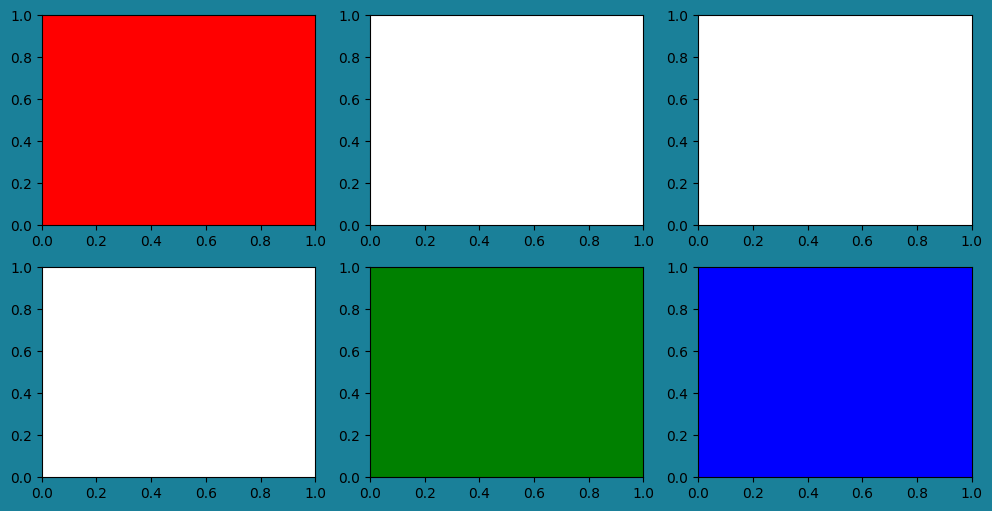

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12,6), facecolor=(0.1,0.5,0.6),sharex=False)
axs[0,0].set_facecolor(color='r')
axs[1,2].set_facecolor(color='b')
axs[1,1].set_facecolor(color='g')


___
## Графики
___

### plt<a>.scatter</a>( ) - `Точечный график`
- `x=` : Данные по оси X
- `y=` : Данные по оси Y
- `marker=` : Форма маркеров
- `s=` : Размер маркеров
- `с=` : Цвет маркеров




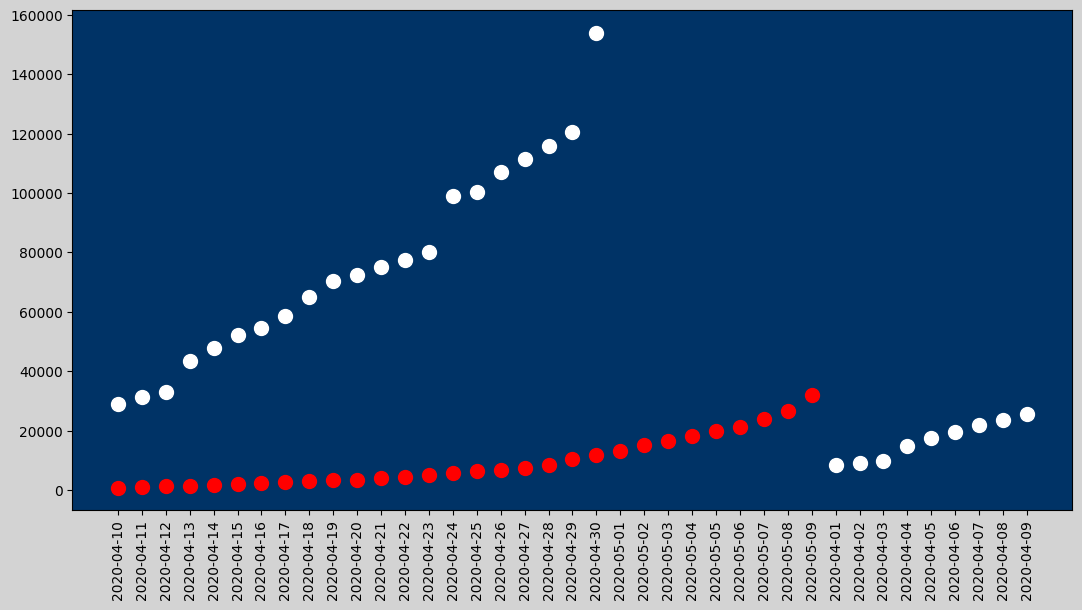

In [6]:
df_russia = df[ df['country'] == 'Russia'][70:100]
df_ch = df[ df['country'] == 'United States'][70:100]

fig = plt.figure(figsize=(10,5), facecolor='lightgray')
axes = fig.add_axes([0,0,1,1],facecolor=(0.0,0.2,0.4), polar=False)
axes.xaxis.set_tick_params(rotation=90)

axes.scatter(x=df_russia['date'], y=df_russia['recovered'], c='r', s=100);
axes.scatter(x=df_ch['date'], y=df_ch['recovered'], c='w', s=100);


##

___
### plt<a>.pie</a>( ) - `Круговая диаграмма`
- `x=` : Данные
- `labels=` : Список с названиями категорий
- `autopct` : Вывод процентных долей данных
- `startangle` : Угол отображения диаграммы
- `rotatelabels` : Угол отображения категорий
- `explode` : Список с значениями расстояний между долями
- `labeldistance=` : Расстояние подписей от центра
- `pctdistance` : Расстояние подписи значений долей








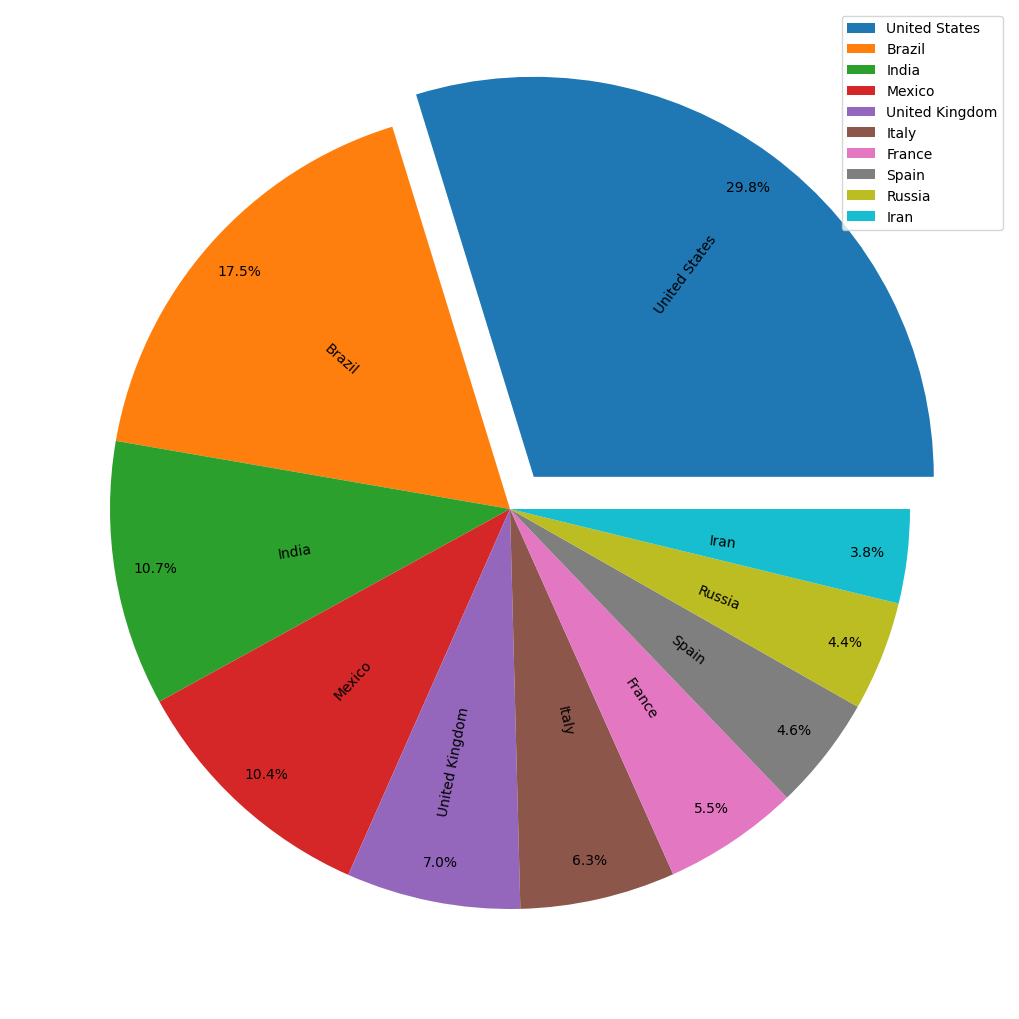

In [7]:
most_death = df.groupby('country')['deaths'].sum().sort_values(ascending=False)[:10]

fig = plt.figure(figsize=(10,10))
axes = fig.add_axes([0,0,1,1])
axes.pie(x=most_death, labels=most_death.index,labeldistance=0.5, explode=[0.1,0,0,0,0,0,0,0,0,0,],autopct='%.1f%%', startangle=0, pctdistance=0.9, rotatelabels=1);
plt.legend()


___
### plt<a>.plot</a>( ) - `Линейный график`
- `lw` :  Толщина линии
- `linestyle=` : Стиль линии

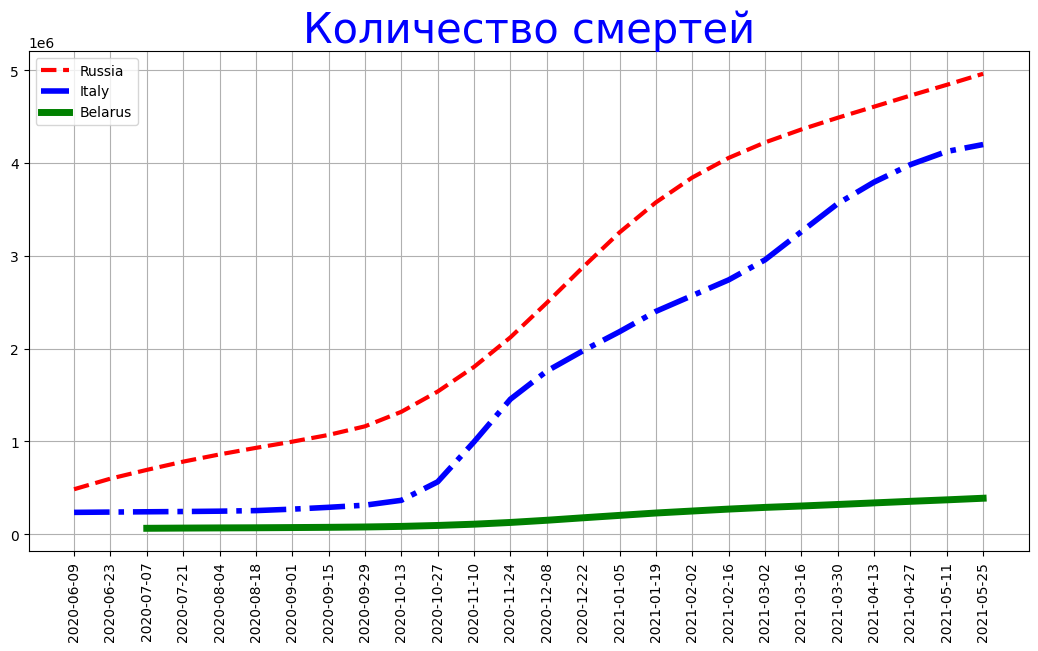

In [8]:
df_deaths = df.groupby(['country','date'])[[ 'confirmed', ]].sum()

fig = plt.figure(figsize=(10,5))
axes = fig.add_axes([0,0,1,1])

axes.plot(df_deaths.loc['Russia'][130:-1:14], lw=3, c='r', label='Russia', linestyle='--')
axes.plot(df_deaths.loc['Italy'][130:-1:14], lw=4, c='b', label='Italy', linestyle='-.')
axes.plot(df_deaths.loc['Belarus'][130:-1:14], lw=5, c='g', label='Belarus')

axes.set_title('Количество смертей', fontsize=30, c='b')
axes.xaxis.set_tick_params(rotation=90)
axes.legend()
axes.grid()


___
### plt<a>.bar</a>( ) - `Столбчатая диаграмма (вертикальная)`
### plt<a>.barh</a>( ) - `Столбчатая диаграмма (горизонтальная)`

- `x=` : Названия категорий
- `height=` :  Значение категории
- `width= ` :  Ширина столбцов
- `edgecolor=` :  Цвет граней столбцов
- `alpha=` :  Прозрачность столбцов
- `bottom=` :  Второй уровень стобцов

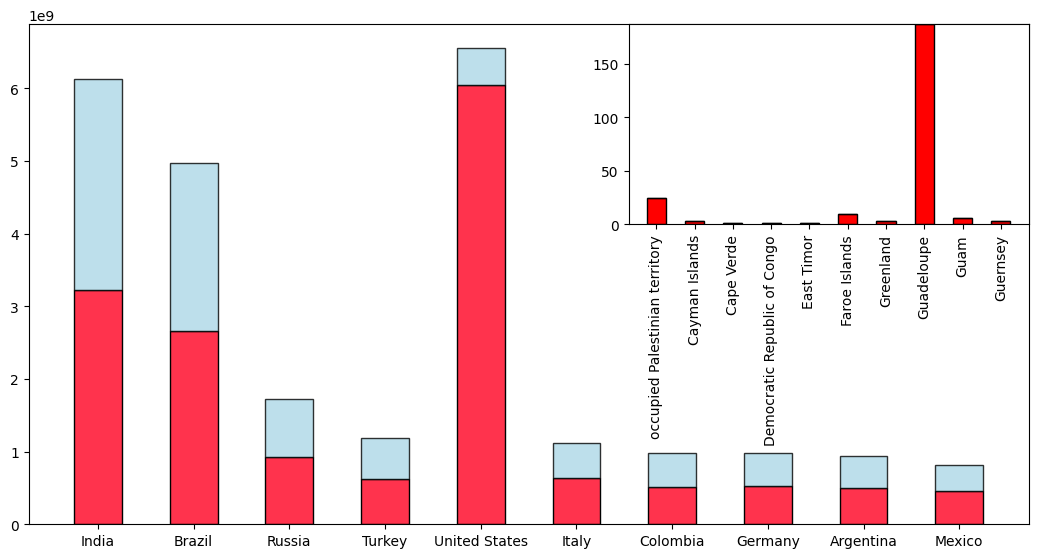

In [13]:
df_rec = df.groupby(['country'])[[ 'confirmed', 'recovered']].sum()
df_rec_largest = df_rec.sort_values(by='recovered', ascending=False)[:10]
df_rec_smallest = df_rec.sort_values(by='recovered', ascending=True)[:10]

fig = plt.figure(figsize=(10,5))
axes_l = fig.add_axes([0,0,1,1])
axes_s = fig.add_axes([0.6,0.6,0.4,0.4])

axes_l.bar(x=df_rec_largest.index, height=df_rec_largest['confirmed'], width=0.5, edgecolor='black', color=(1,0.2,0.3), label= 'Confirmed')
axes_l.bar(x=df_rec_largest.index, height=df_rec_largest['recovered'], width=0.5, edgecolor='black', alpha=0.8, bottom=df_rec_largest['confirmed'],color='lightblue', label='Recovered')

axes_s.bar(x=df_rec_smallest.index, height=df_rec_smallest['confirmed'], width=0.5, edgecolor='black', color='red', label= 'Confirmed')
axes_s.bar(x=df_rec_smallest.index, height=df_rec_smallest['recovered'], width=0.5, edgecolor='black', alpha=0.8, bottom=df_rec_smallest['confirmed'],color='lightblue', label='Recovered')
axes_s.xaxis.set_tick_params(rotation=90)


### plt<a>.hist</a>( ) - `Гистограмма`

- `x=` : Значения для гистограммы
- `bins=` : Количество столбцов
- `orientation=` : Вертикальная / Горизонтальная




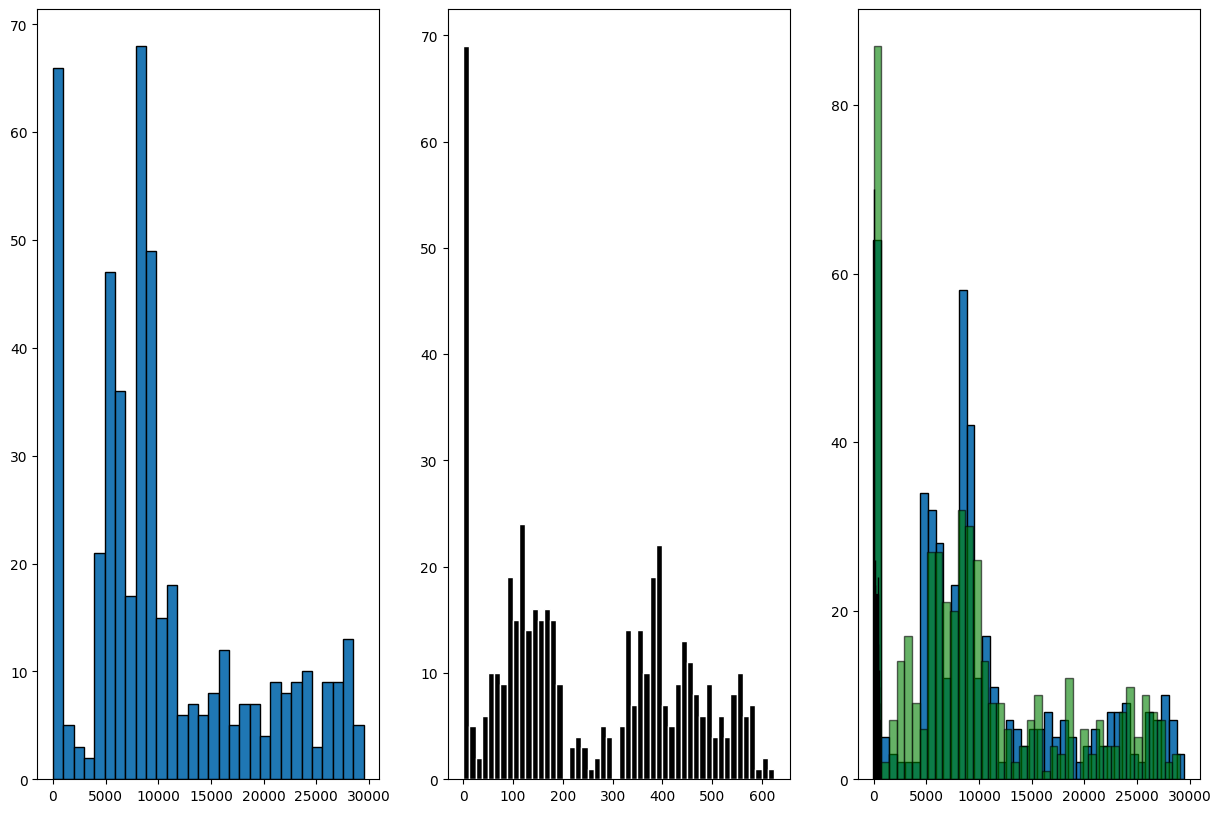

In [22]:
df_rus = df[ df['country'] == 'Russia']

fig, axs = plt.subplots(1,3, figsize=(15,10))
axs[0].hist(df_rus['daily_confirmed'], bins=30, edgecolor='black')
axs[1].hist(df_rus['daily_deaths'], bins=50, color='black', edgecolor='white')

axs[2].hist(df_rus['daily_confirmed'], bins=40, edgecolor='black')
axs[2].hist(df_rus['daily_recovered'], bins=40, color='green', alpha=0.6, edgecolor='black')
axs[2].hist(df_rus['daily_deaths'], bins=40, color='black', edgecolor='black');


___
### plt<a>.boxplot</a>( ) - `Коробчатая гистограмма`

- `x=` : Значения для гистограммы
- `vert=` : Вертикальная ориентация
- `widths=` : Ширина графика
- `showbox=` : Отображает коробку
- `showmeans=` : Отображает среднее



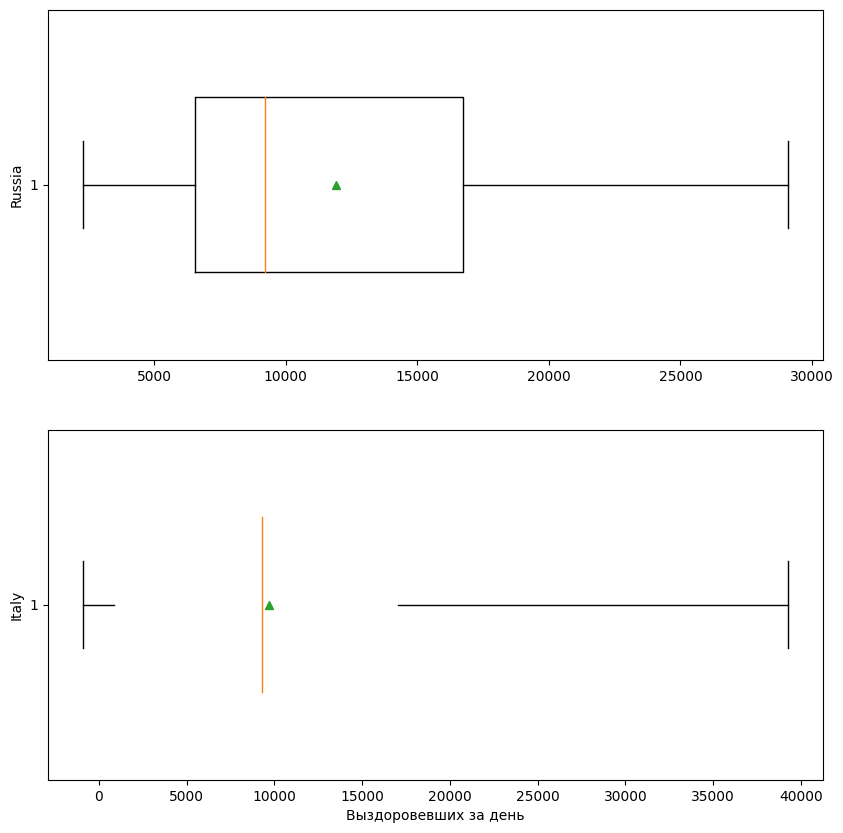

In [11]:
df_rus = df[ df['country'] == 'Russia']
df_it = df[ df['country'] == 'Italy']


fig, axs = plt.subplots(2,1, figsize=(10,10))
axs[0].boxplot(df_rus['daily_recovered'][100:1000], vert=False,widths=0.5,showmeans=True)
axs[0].set_ylabel('Russia')

axs[1].boxplot(df_it['daily_recovered'][100:1000], vert=False, widths=0.5, showmeans=True, showbox=False)
axs[1].set_ylabel('Italy')
axs[1].set_xlabel('Выздоровевших за день');
